## AirBnB Data anaylst

### 1. Business Understanding:

This project aims to follow the CRISP-DM to address the three questions which related to business or real-world applications. The dataset is picked up from Kaggle, contributed by AirBnB, which contains the rent data about Seattle. I would like to process whole data and try to find some valuable data to help owner understand which feature could improve the rate of rent, moreover, whether train a model to predict. Three questions are:

1. What features influence the rating of the house?
2. When is the most popular time for this area?
3. Could we create a model to predict the price?

### 2. Data Understanding

Dataset comes from Kaggle

In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
listing = pd.read_csv('listings.csv')

In [10]:
## to check the feature of the dataset, then fliter
listing.columns.values 

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

### Q1. What features influence the rating of house?

### 2.1 Pre-processing data - the null value columns

In [11]:
## check the missing value
listing.isnull().mean().sort_values() 

id                  0.000000
price               0.000000
amenities           0.000000
bed_type            0.000000
accommodates        0.000000
                      ...   
weekly_price        0.473808
security_deposit    0.511262
monthly_price       0.602672
square_feet         0.974594
license             1.000000
Length: 92, dtype: float64

In [12]:
## calculate how many column has missing value
miss_num = np.sum(listing.isnull().mean() != 0) 
miss_num 

46

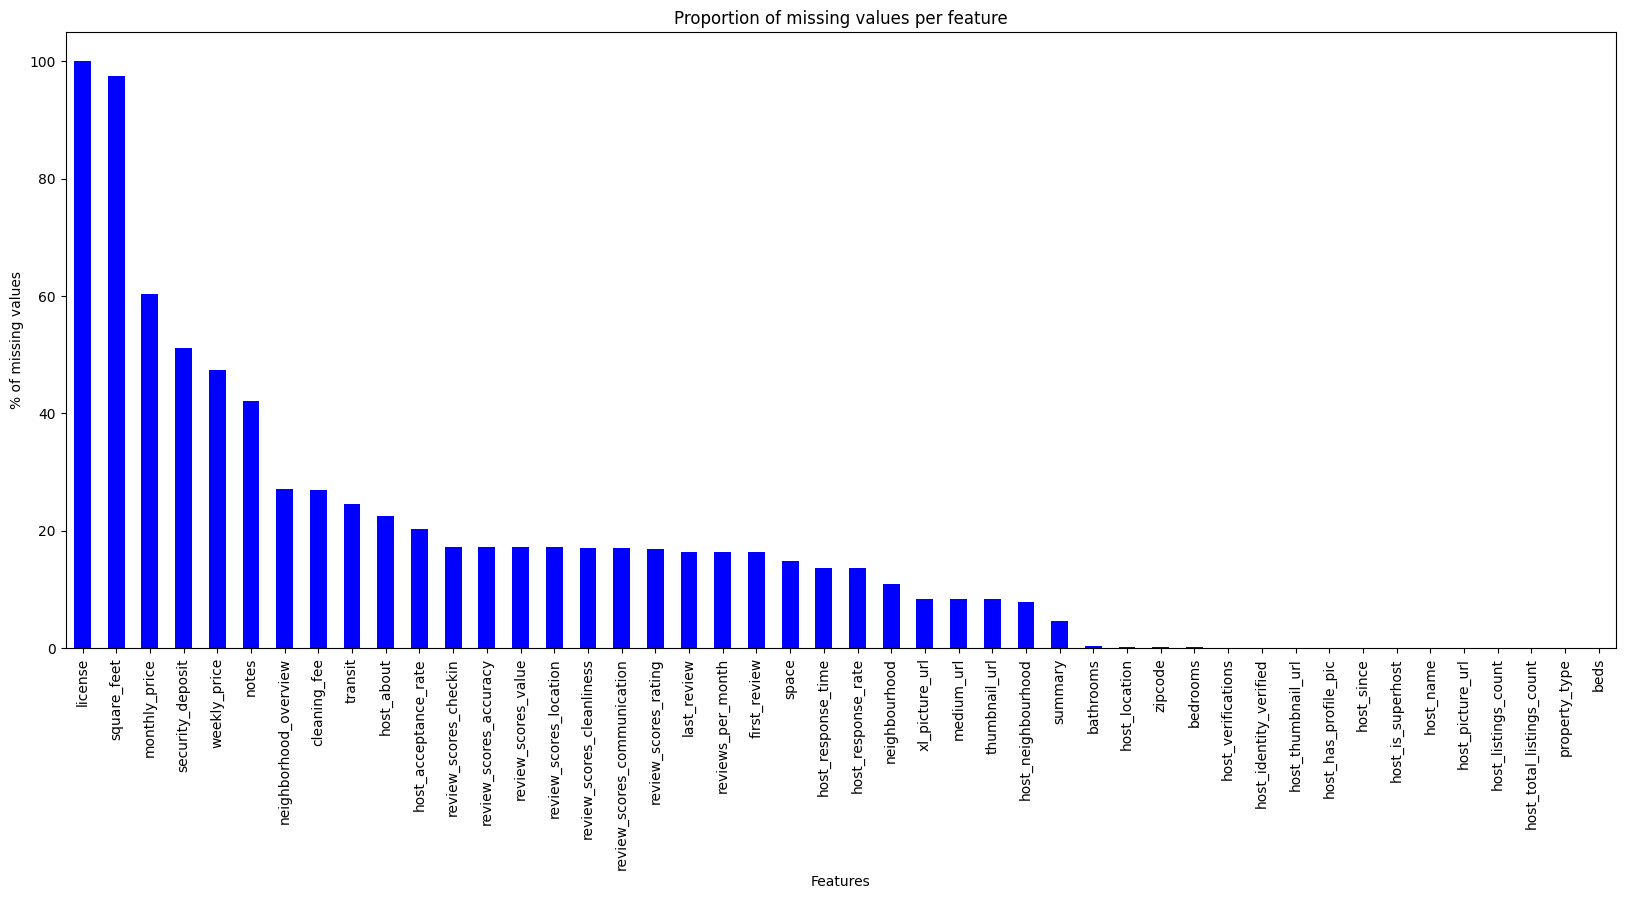

In [13]:
# visulize the missing data
plt.figure(figsize=(20,8))
(listing.isnull().sum(axis = 0).sort_values(ascending=False)[:miss_num]/len(listing)*100).plot(kind='bar', facecolor='b');
plt.title('Proportion of missing values per feature')
plt.ylabel('% of missing values')
plt.xlabel("Features");

As we can see above, the features of "security_deposit", "monthly_price", "square_feet" and "license" are missing more than 50% values, and these features are unnecessary for the project, thus, I will drop them. Technically, I will make a copy of original data.

In [14]:
#back up dataset
listing_backup = listing.copy()

In [15]:
# drop the columns which lose more than 50% missing value
listing = listing.drop(['security_deposit', 'monthly_price', 'square_feet', 'license'], axis = 1)

In [16]:
## check again, I have dropped them all
listing.isnull().mean().sort_values() 

id                       0.000000
price                    0.000000
amenities                0.000000
bed_type                 0.000000
accommodates             0.000000
                           ...   
transit                  0.244631
cleaning_fee             0.269775
neighborhood_overview    0.270299
notes                    0.420639
weekly_price             0.473808
Length: 88, dtype: float64

In [17]:
# check and summary the column of missing data
miss_num = np.sum(listing.isnull().mean() != 0)
miss_num

42

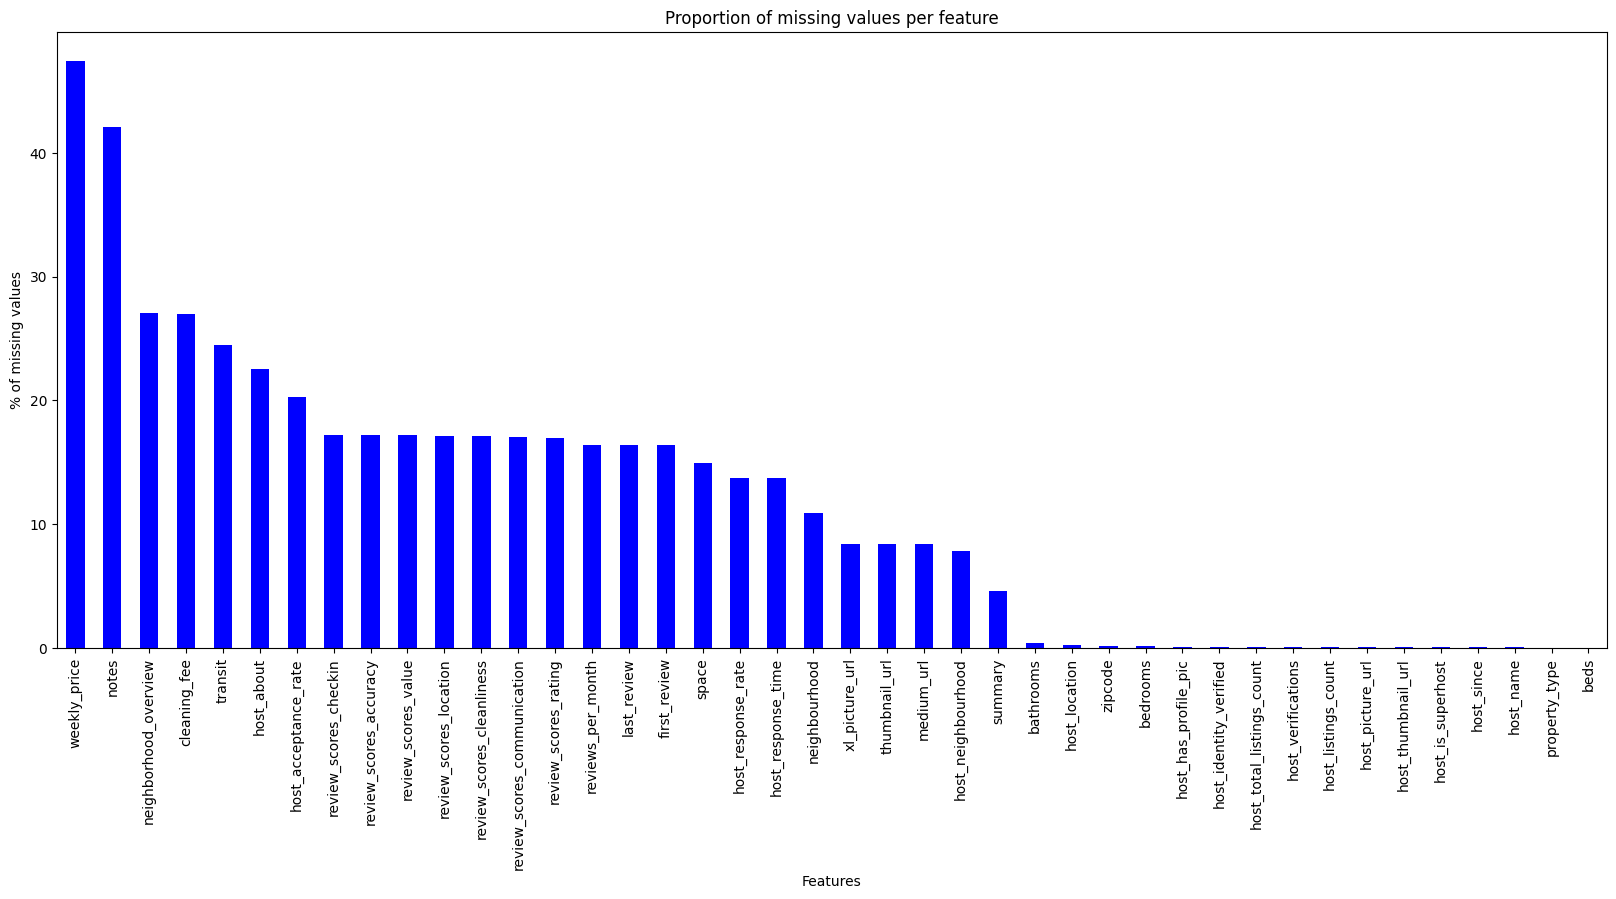

In [18]:
# visulize the missing data to check
plt.figure(figsize=(20,8))
(listing.isnull().sum(axis = 0).sort_values(ascending=False)[:miss_num]/len(listing)*100).plot(kind='bar', facecolor='b');
plt.title('Proportion of missing values per feature')
plt.ylabel('% of missing values')
plt.xlabel("Features");

In [19]:
# check the total features
listing.shape

(3818, 88)

Currently, the dataset has 88 features. Although the column of 'Weekly_price' quite close 50%, it may will be used, just keep it first. However, I think the dataset still contain some outliers and useless data, I will continue to process.

### 2.2 Processing the outliers and useless data

#### 2.2.1, As the final target is prediction. The column of "id" and "note" are doesn't help to predict, so drop its

In [20]:
def drop_columns(m_columns):
    listing.drop(columns = m_columns, inplace = True)

In [21]:
drop_columns = ['id', 'notes']
drop_columns(drop_columns)

TypeError: 'list' object is not callable

#### 2.2.2 When I check the features, I found the values of some columns are link, which also could be defined as useless data.

In [ ]:
## the column contains key word of 'url'
url_col=[col for col in listing.columns.values if 'url' in col]
url_col
drop_columns(url_col)

#### 2.2.3 Furthermore, there are some wired values, which means whole column only one value. I think those data won't help me to predict, drop it!

In [ ]:
unique_col=[col for col in listing.columns.values if listing[col].nunique()==1]
unique_col
drop_columns(unique_col)

#### 2.2.4 Next, after checking again, I think some columns that contains 'host', which may not be relevant for the prediction. For instance, 'host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'host_neighbourhood'. Same operate as before. Drop it.

In [ ]:
drop_cols=['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'host_neighbourhood']
drop_columns(drop_cols)

#### 2.2.5 Lastly, the unstructured and redundant data. Some columns, such as City, State, Street, smart_location, latitude and longitude, could be represented by other value - zipcode. Therefore, they can be dropped

In [ ]:
drop_cols=['city','street','state','smart_location','latitude','longitude', 'neighbourhood_cleansed']
drop_cols ## It shows what is the columns I will drop
drop_columns(drop_cols)

In [ ]:
#drop columns containing unstructured data
drop_cols=['name','summary', 'space', 'description', 'neighborhood_overview','transit', 'first_review', 'last_review', 'calendar_updated']
drop_cols
drop_columns(drop_cols)

In [ ]:
# review_scores_rating is likely a combination of the other review scores so no need to keep them all.
# furthermore, I want to find which features has a high relationship with rating, I would like to assume another review scores 
# has an exterme influence 
listing.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','reviews_per_month',
                      'review_scores_communication', 'review_scores_location', 'review_scores_value'
                     ], axis=1, inplace=True)

In [ ]:
## Now, we have 38 features after dropping columns, 
## then next step, I will transfer categorical data and fill up missing value of some columns
listing.shape 

(3818, 38)

In [ ]:
# check the sample
listing.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,within a few hours,96%,100%,f,3.0,3.0,t,t,Queen Anne,Queen Anne,...,41,71,346,207,95.0,f,moderate,f,f,2
1,within an hour,98%,100%,t,6.0,6.0,t,t,Queen Anne,Queen Anne,...,13,16,291,43,96.0,f,strict,t,t,6
2,within a few hours,67%,100%,f,2.0,2.0,t,t,Queen Anne,Queen Anne,...,6,17,220,20,97.0,f,strict,f,f,2
3,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,Queen Anne,...,0,0,143,0,NaN,f,flexible,f,f,1
4,within an hour,100%,NaN,f,2.0,2.0,t,t,Queen Anne,Queen Anne,...,60,90,365,38,92.0,f,strict,f,f,1


### 2.3 Filling up missing value and transferring categorical data

##### 2.3.1 transferring categorical data

In [ ]:
# Creating a table to visual the total value
pd.merge(pd.DataFrame(listing.dtypes,columns=['datatype']).reset_index(),
         pd.DataFrame(pd.DataFrame(listing.iloc[0]).reset_index()),on='index')

,index,datatype,0
0,host_response_time,object,within a few hours
1,host_response_rate,object,96%
2,host_acceptance_rate,object,100%
3,host_is_superhost,object,f
4,host_listings_count,float64,3
5,host_total_listings_count,float64,3
6,host_has_profile_pic,object,t
7,host_identity_verified,object,t
8,neighbourhood,object,Queen Anne
9,neighbourhood_group_cleansed,object,Queen Anne


In [ ]:
# get the name of columns which contain categorical data
listing.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_group_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'cleaning_fee', 'extra_people',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [ ]:
# to check unique value of the 'zip' column
listing.zipcode.unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [22]:
# there is a outlier in zipcode, which need fix
listing.zipcode.replace('99\n98122','98122',inplace=True)

C:\Users\skazi\AppData\Local\Temp\ipykernel_7028\3768658730.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing.zipcode.replace('99\n98122','98122',inplace=True)


In [ ]:
# summary the categorical columns and check the values
categorical_col = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 
       'neighbourhood_group_cleansed', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'cleaning_fee', 'extra_people', 
       'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification']

for i in categorical_col:
    print(i,":", listing[i].unique(), "\n")

host_response_time : ['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more'] 

host_response_rate : ['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%'] 

host_acceptance_rate : ['100%' nan '0%'] 

host_is_superhost : ['f' 't' nan] 

host_has_profile_pic : ['t' 'f' nan] 

host_identity_verified : ['t' 'f' nan] 

neighbourhood : ['Queen Anne' nan 'Ballard' 'Phinney Ridge' 'Fremont' 'Lower Queen Anne'
 'Westlake' 'Wallingford' 'Green Lake' 'Minor' 'Madrona'
 'Harrison/Denny-Blaine' 'Leschi' 'University District' 'Roosevelt'
 'Madison Park' 'Capitol Hill' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place Market' 'Pike Market' 'Eastlake'
 'Portage Bay' 'South Lake Union' 'Magnolia' 'Belltown'
 'International District' 'Y

In [ ]:
## transfer the columns which contains 'f', 't'
Binary_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for i in Binary_cols:
     listing[i] = listing[i].map(lambda x: 1 if x == 't' else 0)

In [ ]:
# to check whether the value is change
listing['host_is_superhost'].unique()

array([0, 1])

In [ ]:
# same with last step, hot-coding to dummny variables
encode_cols=['host_response_time','neighbourhood_group_cleansed','zipcode', 'neighbourhood'
             ,'property_type','room_type','bed_type','cancellation_policy']
listing=pd.get_dummies(data=listing, columns=encode_cols)

In [ ]:
listing.shape # Cheking, after convert to dummy variables

(3818, 186)

In [ ]:
# to check the sample
listing.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96%,100%,0,3.0,3.0,1,1,1,4,1.0,...,0,0,0,0,0,0,1,0,1,0
1,98%,100%,1,6.0,6.0,1,1,1,4,1.0,...,0,0,0,0,0,0,1,0,0,1
2,67%,100%,0,2.0,2.0,1,1,1,11,4.5,...,0,0,0,0,0,0,1,0,0,1
3,NaN,NaN,0,1.0,1.0,1,1,1,3,1.0,...,0,0,0,0,0,0,1,1,0,0
4,100%,NaN,0,2.0,2.0,1,1,1,6,2.0,...,0,0,0,0,0,0,1,0,0,1


#### 2.3.2 Engineering for 'amenities' column

Next I will engineer 'amenities' column to extract categorical variables. Since the amenities column is in the form of list of amenities, I will extract each amenity and it would be its own categorical feature for each listing.

In [23]:
# process the data of amenities column, splite it first
listing.amenities = listing.amenities.str.replace("[{}]", "") 
amenities_col = listing.amenities.str.get_dummies(sep = ",")
listing_cleaned = pd.merge(listing, amenities_col, left_index=True, right_index=True)

In [ ]:
# drop the amenities column now that is has been onehot encoded
listing_cleaned.drop(['amenities'], axis=1, inplace = True)

In [ ]:
# to check the amenities column already split
listing_cleaned.shape
listing_cleaned.head(3)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,96%,100%,0,3.0,3.0,1,1,1,4,1.0,...,0,0,1,1,0,1,0,0,1,1
1,98%,100%,1,6.0,6.0,1,1,1,4,1.0,...,0,0,1,1,0,1,0,0,1,1
2,67%,100%,0,2.0,2.0,1,1,1,11,4.5,...,0,0,1,1,0,1,0,1,1,1


#### 2.3.3 Checking missing value and filling up

In [ ]:
# check what column has missing value
listing_cleaned.isnull().mean().sort_values() 

neighbourhood_Leschi                 0.000000
neighbourhood_Seward Park            0.000000
neighbourhood_South Beacon Hill      0.000000
neighbourhood_South Delridge         0.000000
neighbourhood_South Lake Union       0.000000
neighbourhood_South Park             0.000000
neighbourhood_Stevens                0.000000
neighbourhood_The Junction           0.000000
neighbourhood_University District    0.000000
neighbourhood_Victory Heights        0.000000
neighbourhood_View Ridge             0.000000
neighbourhood_Wallingford            0.000000
neighbourhood_Seaview                0.000000
neighbourhood_Wedgewood              0.000000
neighbourhood_Windermere             0.000000
neighbourhood_Yesler Terrace         0.000000
property_type_Apartment              0.000000
property_type_Bed & Breakfast        0.000000
property_type_Boat                   0.000000
property_type_Bungalow               0.000000
property_type_Cabin                  0.000000
property_type_Camper/RV           

In [ ]:
# summary the missing value column and to find out what is value of them, ready to fill up
missing_cols = ['beds','host_listings_count','host_total_listings_count','bedrooms','bathrooms',
               'host_response_rate','review_scores_rating',              
               'cleaning_fee']

for x in missing_cols:
    print(x,":", listing_cleaned[x].unique(), "\n")

beds : [ 1.  7.  2.  3. 15.  5.  4.  6.  9.  8. nan 10.] 

host_listings_count : [  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163.  17.] 

host_total_listings_count : [  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11. 169.  48. 502.  12.  nan  18.  19.  15.  84. 163.  17.] 

bedrooms : [ 1.  5.  0.  3.  2.  6.  4. nan  7.] 

bathrooms : [1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  nan 5. ] 

host_response_rate : ['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%' '90%' '70%'
 '88%' '80%' '63%' '33%' '99%' '75%' '83%' '94%' '58%' '43%' '93%' '92%'
 '40%' '57%' '89%' '95%' '78%' '81%' '91%' '38%' '86%' '30%' '56%' '76%'
 '64%' '82%' '17%' '87%' '25%' '69%' '53%' '65%' '68%' '55%'] 

review_scores_rating : [ 95.  96.  97.  nan  92.  99.  98. 100.  80.  85.  84.  88.  75.  90.
  91.  94.  93.  77.  89.  71.  82.  87.  73.  83.  86.  76.  78.  66.
  74.  60.  64

As we can see, for the host_acceptance_rate column, there are only 3 unique values, which including Nan. Hence, I will 
drop this column as it does not offer an useful information.

In [ ]:
#drop host_acceptance_rate column
listing_cleaned.drop(columns='host_acceptance_rate',inplace=True)

Weekly price be dropped. In my mind, firstly, it lost almost 50% data, it is not an accurate data. Next, it could be 
the target value to be predicted, but not an independant value.

In [ ]:
# drop the weekly_price column
listing_cleaned.drop(columns='weekly_price',inplace=True)

In [ ]:
# Transfer String to float
dollar_cols = ['cleaning_fee', 'extra_people', 'price']
listing_cleaned[dollar_cols]=listing_cleaned[dollar_cols].replace('[\$,]', '', regex=True).astype(float)
percent_cols = ['host_response_rate']
listing_cleaned[percent_cols]=listing_cleaned[percent_cols].replace('%', '', regex=True).astype(float)
listing_cleaned[percent_cols]=listing_cleaned[percent_cols]/100

In [ ]:
# to check whether string already transfer to float
listing_cleaned.cleaning_fee.head()

0      NaN
1     40.0
2    300.0
3      NaN
4    125.0
Name: cleaning_fee, dtype: float64

In [ ]:
# to check whether string already transfer to float
listing_cleaned.host_response_rate.head()

0    0.96
1    0.98
2    0.67
3     NaN
4    1.00
Name: host_response_rate, dtype: float64

There are many missing values in review related features because these are new listings and don't get reviewed yet. In reality, travellers usually prefer listings with high number of reviews and high review scores. It might be possible to use a form of clustering to make a better estimate for this feature by looking at the other review scores for the same listing in the cases where these aren't missing. Considering this, I will replace missing values in review related features with mean value of each column.

In [ ]:
# fill up missing value with mean of their column
for x in missing_cols:
    listing_cleaned[x] = listing_cleaned[x].fillna(listing_cleaned[x].mean())

In [ ]:
# check whether the missing value is appear
listing_cleaned.isnull().mean().sort_values() 

host_response_rate                   0.0
neighbourhood_South Beacon Hill      0.0
neighbourhood_South Delridge         0.0
neighbourhood_South Lake Union       0.0
neighbourhood_South Park             0.0
neighbourhood_Stevens                0.0
neighbourhood_The Junction           0.0
neighbourhood_University District    0.0
neighbourhood_Victory Heights        0.0
neighbourhood_View Ridge             0.0
neighbourhood_Wallingford            0.0
neighbourhood_Wedgewood              0.0
neighbourhood_Seward Park            0.0
neighbourhood_Westlake               0.0
neighbourhood_Yesler Terrace         0.0
property_type_Apartment              0.0
property_type_Bed & Breakfast        0.0
property_type_Boat                   0.0
property_type_Bungalow               0.0
property_type_Cabin                  0.0
property_type_Camper/RV              0.0
property_type_Chalet                 0.0
property_type_Condominium            0.0
property_type_Dorm                   0.0
property_type_Ho

### 3. Modelling

Base on the Q1 of business understanding, I will check which feature influnce the rating of the house. 
Thus, 'review_scores_rating' would be the target(dependent) variable. 

In [ ]:
# split the data into different column, prepare to create a model
y = listing_cleaned['review_scores_rating']
X = listing_cleaned.drop(['review_scores_rating'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor ### I use Decision Tree as there are a lot of features
from sklearn.grid_search import GridSearchCV

In [ ]:
# finding the best parameters
dt = DecisionTreeRegressor(random_state=42)
parameters = { 'max_depth': [20, 30, 40],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2]}
gridCV = GridSearchCV(estimator = dt, param_grid = parameters, cv = 5)

In [ ]:
# training model with dataset
gridCV.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [20, 30, 40], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [ ]:
# to find out what is the best features
gridCV.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
# list the important features
importance_t = pd.DataFrame(data=[X.columns,gridCV.best_estimator_.feature_importances_]).T
importance_t.columns = ['feature','importance']
importance_t.sort_values(by='importance',ascending=False)[:5]

,feature,importance
21,number_of_reviews,0.10956
20,availability_365,0.0919596
1,host_is_superhost,0.0640988
11,price,0.0600418
12,cleaning_fee,0.0463365


Apparently, many reiviews that has a extermely imporant coefficients with the rating! More reviews which means the house always be the best choice, and people would follow this trend when they are choosing.      
Besides, we can see that price is an important factor for rating (I think so, price always play a key role, which not a surprise).          
For most of the properties, cleaning fee is included in the price, so the higher the cleaning fee, the higher the price. Most of people select house from AirBnB as they need a convenient and cleaning house. Therefore, it makes sense both the price and cleaning fee are on top 5 list.        
365 day-availability and host is superhost are the key role in rating, which Straightly reflect the conception of consume of current customer. They hope that they could rent the house at anytime if they need.

### Q2. When is the most popular time for this area?

#### 4.1 Loading data

We are mainly looking at the calendar dataset. As seen during the Data Exploration stage, the dataset contains the listings, dates, availability and the price.

In [ ]:
# loading data
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### 4.2 Pre-processing data

In [ ]:
# a lot of missing value in 'Price', but we are not interest it. :)
calendar.isnull().sum() 

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [ ]:
# drop the column that I dont use
alendar.drop(columns = 'price').head(5)

,listing_id,date,available
0,241032,2016-01-04,t
1,241032,2016-01-05,t
2,241032,2016-01-06,f
3,241032,2016-01-07,f
4,241032,2016-01-08,f


In [ ]:
# to find out when is busy days
popular_time=calendar[calendar['available']=='f']

In [ ]:
#group dataset by date
popular_time=popular_time.groupby('date')['listing_id'].count()

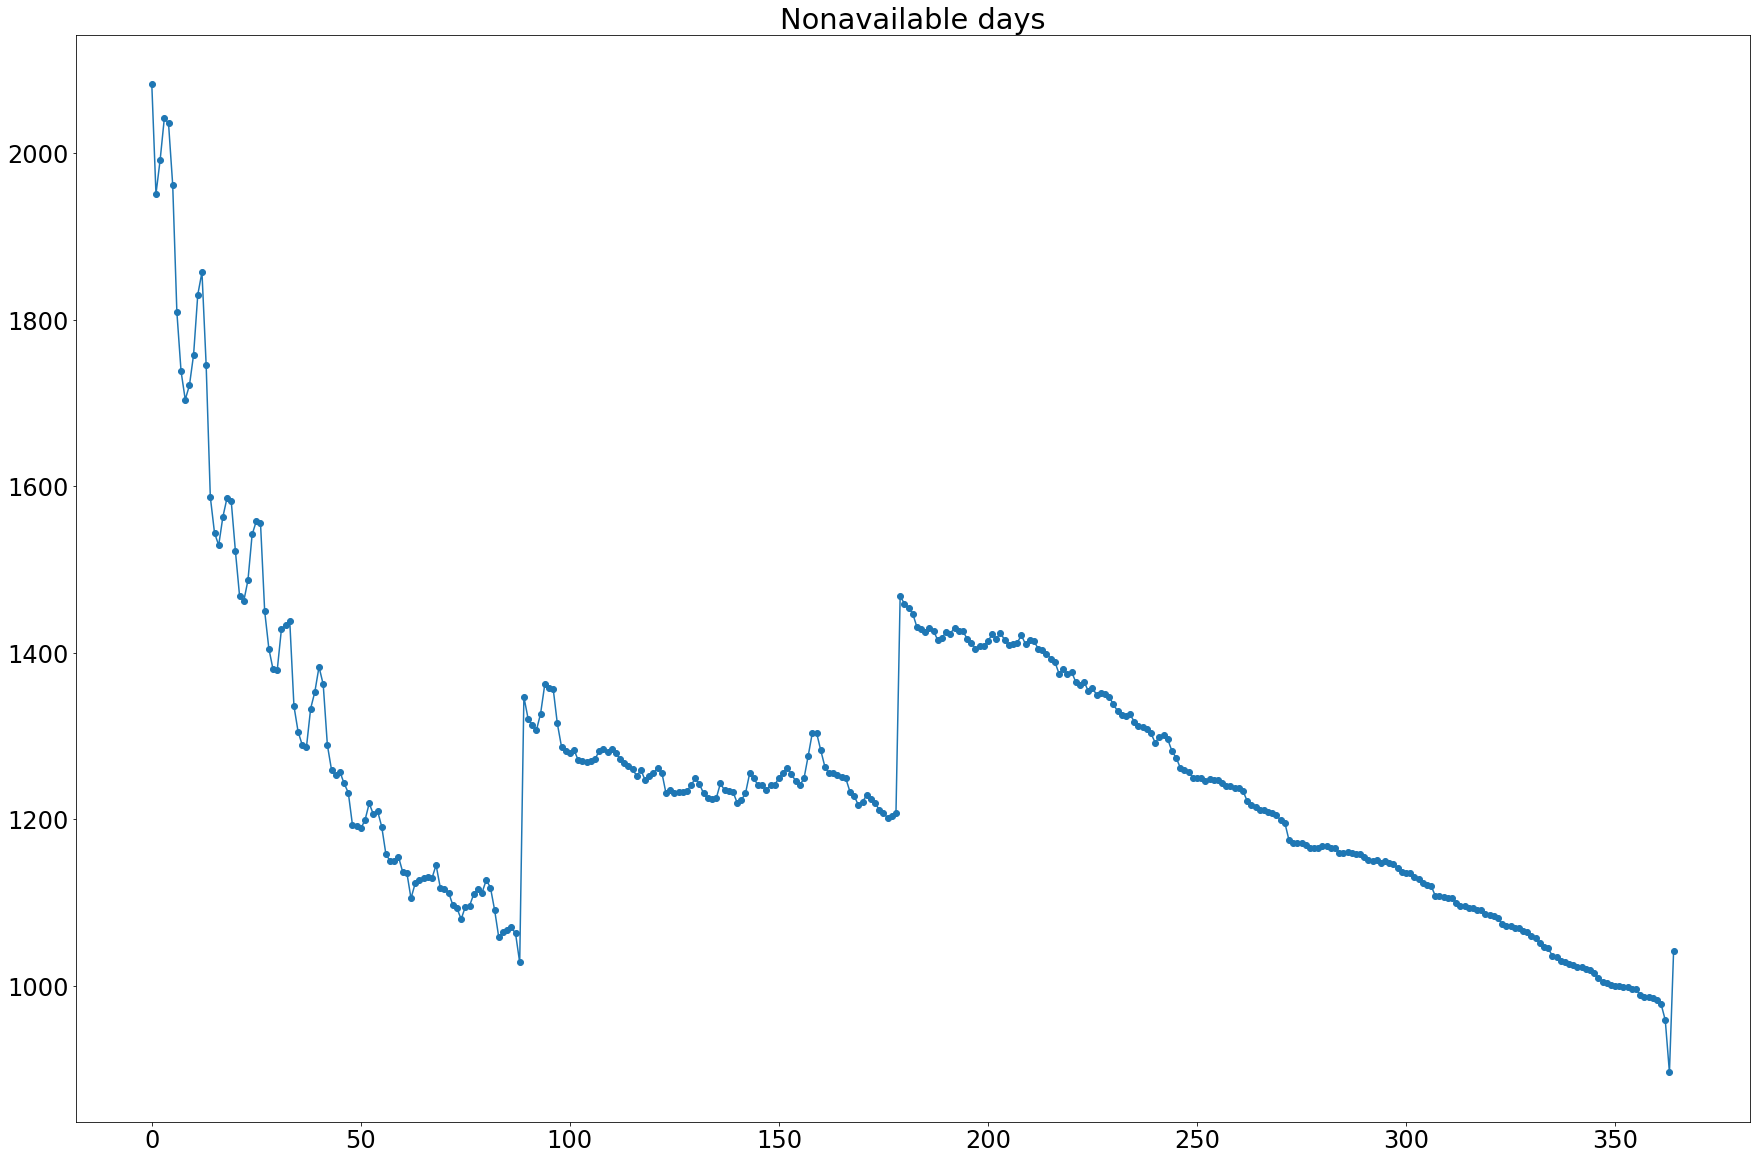

In [ ]:
# visualize Data
df=pd.DataFrame({'date': popular_time.index, 'count': popular_time.values })
df
# plot trend of unavailable listings
plt.figure(figsize=(30,20))
plt.plot(df['count'], 'o-')
plt.title('Nonavailable days')
plt.show()

It could no be clearly see from this graph, we still need to sort it

In [ ]:
# to list the data that what I need
popular_time.sort_values(ascending=False).head(50)

date
2016-01-04    2083
2016-01-07    2042
2016-01-08    2036
2016-01-06    1992
2016-01-09    1962
2016-01-05    1951
2016-01-16    1857
2016-01-15    1830
2016-01-10    1809
2016-01-14    1758
2016-01-17    1746
2016-01-11    1738
2016-01-13    1721
2016-01-12    1704
2016-01-18    1587
2016-01-22    1586
2016-01-23    1582
2016-01-21    1563
2016-01-29    1558
2016-01-30    1556
2016-01-19    1544
2016-01-28    1542
2016-01-20    1529
2016-01-24    1522
2016-01-27    1487
2016-01-25    1468
2016-07-01    1468
2016-01-26    1462
2016-07-02    1459
2016-07-03    1454
2016-01-31    1450
2016-07-04    1447
2016-02-06    1438
2016-02-05    1433
2016-07-05    1431
2016-07-14    1430
2016-07-08    1430
2016-07-06    1428
2016-02-04    1428
2016-07-16    1426
2016-07-15    1426
2016-07-09    1426
2016-07-07    1425
2016-07-12    1425
2016-07-25    1424
2016-07-13    1423
2016-07-23    1422
2016-07-30    1421
2016-07-11    1418
2016-07-24    1417
Name: listing_id, dtype: int64

As we can see, January and July are the popular time for this area. Then, combining the results of question 1 and question 2, whatever is a host or a customer, they could make a strategy that how to improve the rating or attract the customer.

### Q3.Could we create a model to predict the price?

Actually same with Q1, I would like to use DecisionTreeModel to train the dataset. The parameters will be used, which tested at Q1.

In [ ]:
# We use the data after cleaning
y_st = listing_cleaned.price
X_st = listing_cleaned.drop(['price'], axis = 1)

X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y_st, test_size = .20, random_state=42)

# Check the datasets
print(X_train_st.shape, y_train_st.shape)
print( X_test_st.shape, y_test_st.shape)

(3054, 223) (3054,)
(764, 223) (764,)


In [ ]:
# import the libary
from sklearn.metrics import r2_score

In [ ]:
# initial model and train model
regressor = DecisionTreeRegressor(max_depth=30, min_samples_leaf=2, min_samples_split= 2, random_state=42)
regressor = regressor.fit(X_train_st, y_train_st)
pred = regressor.predict(X_test_st)

In [ ]:
# Check how good the model is by calculating r-squared on the test set
print("The r-squared for the model is:", r2_score(y_test_st, pred))

The r-squared for the model is: 0.412996290368991


It shows above, there is a model that could be created, which is decision tree. The reason is features is not too many or less, and avoid overfitting. We could see, the R2 score is 0.41, which means 41% of the variance in Y can be predicted from X. Futhermore, the dataset just normal processing and the model does not train quite good, if spending more time to adjust the model, I think the score will be increase.

### 5. Conclusion

In this project, I have analized the dataset about renting house from the Kaggle, which provided by AirBnb. The main motivation is to find out more insights for Airbnb business owners and customer in Seattle.   

Through the analyst, we can see, a rating for a house is quite important. To improve the rating, number of reviews, cleaning fee, price, available days and house's owner is the Top 5 feature which has a big influence for attacting customer. The popular time for the customer is January and July.

Futhuremore, we could use scientice tool, such as data analyst to mining more valuable information